# Importing required Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset 

In [60]:
#url = "https://www.kaggle.com/datasets/zhaoyingzhu/heartcsv"

dataset =  pd.read_csv("heart.csv")

# Total number of rows and columns in the Dataset

In [3]:
num_rows, num_columns = dataset.shape

print("Total number of rows in dataset:",num_rows)
print("Total number of columns in dataset:",num_columns)

Total number of rows in dataset: 303
Total number of columns in dataset: 14


# Viewing Random sample of Data from the Dataset

In [4]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1


# Checking for any Null values in the Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Description of the Dataset

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Columns of Dataset and what they indicate

In [7]:
info = ["age of the person","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t"+info[i])

age:		age of the person
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		 maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


# Analysing the 'target' variable of the Dataset

In [8]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [9]:
dataset["target"].unique()

array([1, 0], dtype=int64)

# Exploratory Data Analysis (EDA)

# 1. Analysing the target variable:

1    165
0    138
Name: target, dtype: int64


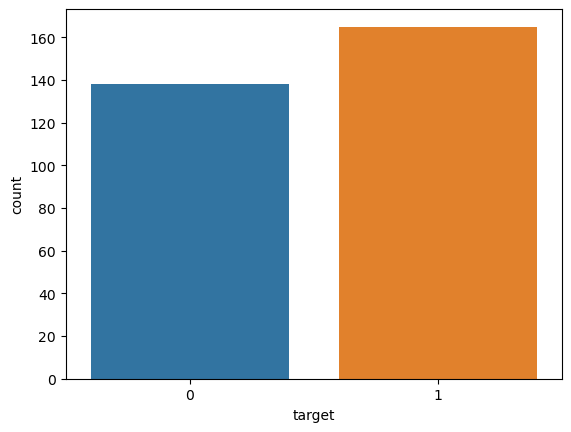

In [10]:
y = dataset["target"]

sns.countplot(y)

target_temp = dataset.target.value_counts()

print(target_temp)

In [11]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


# 2. Analysing the 'Sex' feature

In [12]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

In [13]:
# We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot:xlabel='sex', ylabel='target'>

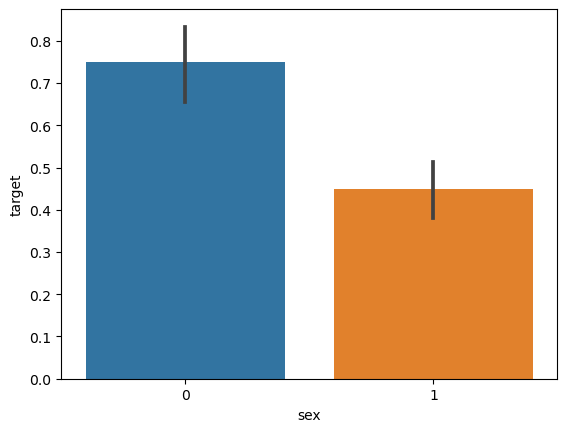

In [14]:
sns.barplot(dataset["sex"],y)

In [15]:
# We notice, that females are more likely to have heart problems than males

# 3. Analysing the 'Chest Pain Type' feature

In [16]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [17]:
# As expected, the CP feature has values from 0 to 3

<AxesSubplot:xlabel='cp', ylabel='target'>

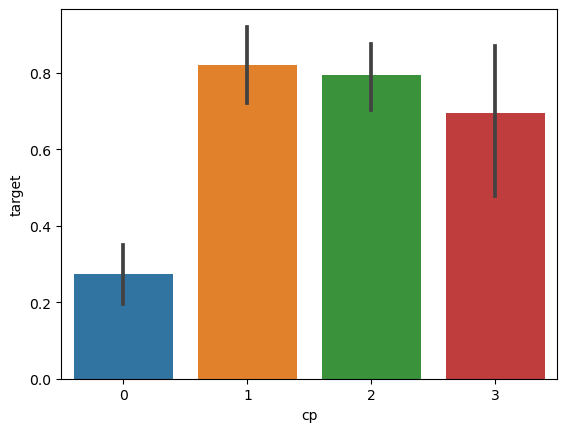

In [18]:
sns.barplot(dataset["cp"],y)

In [19]:
# We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

# 4. Analysing the FBS feature

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

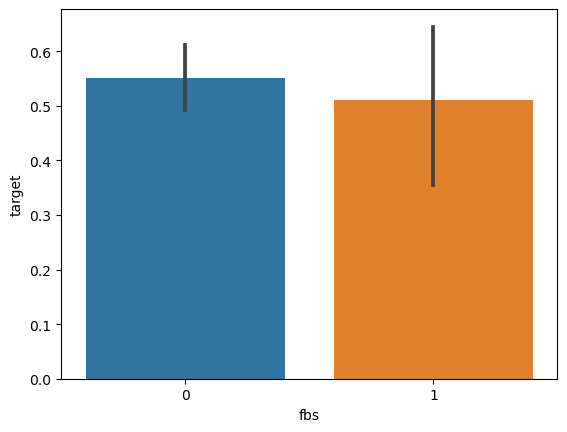

In [22]:
sns.barplot(dataset["fbs"],y)

In [23]:
# No Significant Difference here

# 5. Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

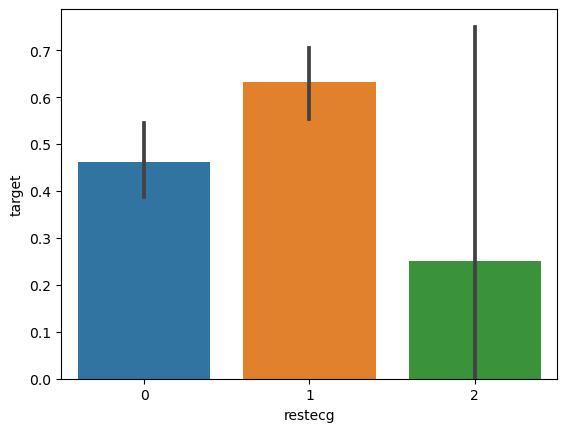

In [25]:
sns.barplot(dataset["restecg"],y)

In [26]:
# We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# 6. Analysing the 'exang' feature

In [27]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

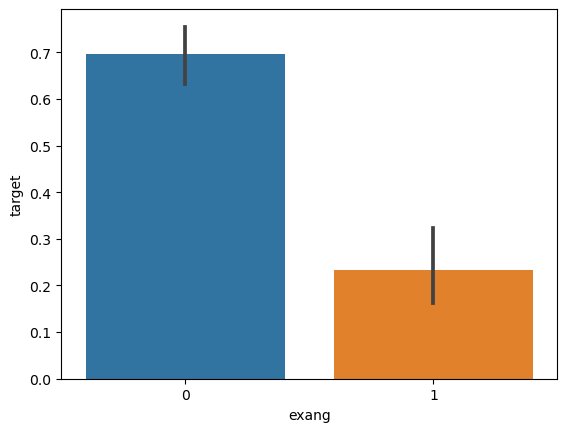

In [28]:
sns.barplot(dataset["exang"],y)

In [29]:
# People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

# 7. Analysing the Slope feature

In [30]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

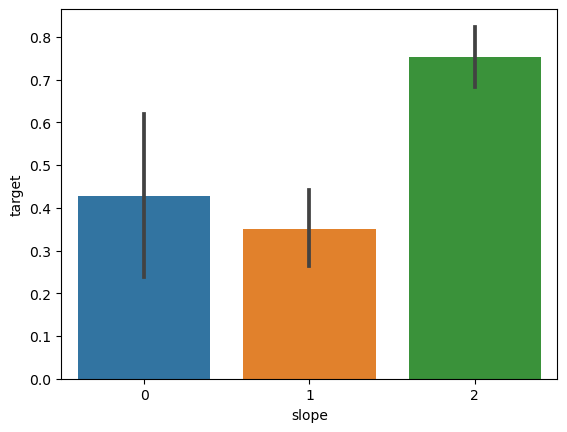

In [31]:
sns.barplot(dataset["slope"],y)

In [32]:
# We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

# 8. Analysing the 'ca' feature

In [33]:
#number of major vessels (0-3) colored by flourosopy

In [34]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

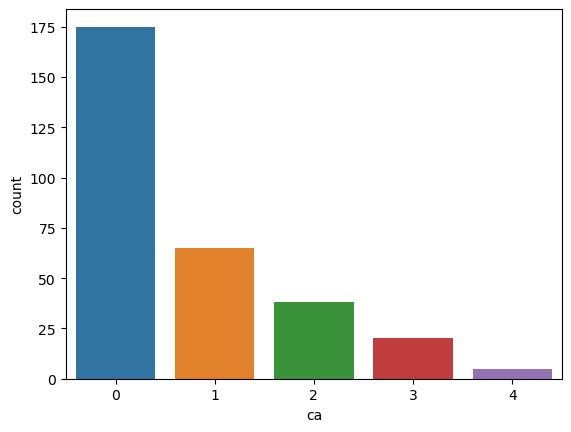

In [35]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

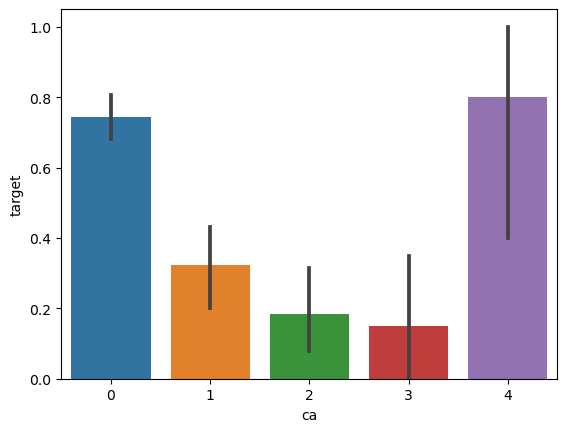

In [36]:
sns.barplot(dataset["ca"],y)

In [37]:
# We can see that ca=4 has astonishingly large number of heart patients

# 9. Analysing the 'thal' feature

In [38]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

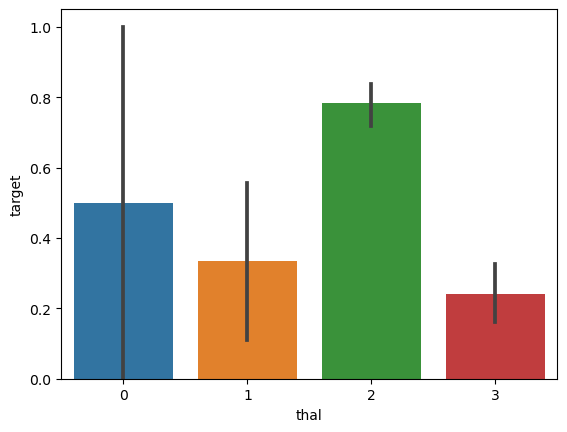

In [39]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

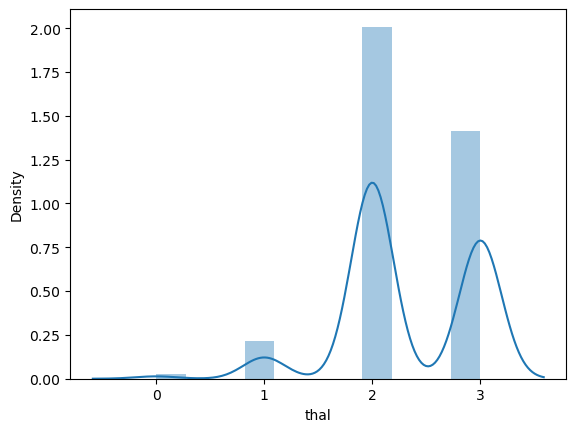

In [40]:
sns.distplot(dataset["thal"])

# Train Test split

In [41]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [42]:
X_train.shape

(242, 13)

In [43]:
X_test.shape

(61, 13)

In [44]:
Y_train.shape

(242,)

In [45]:
Y_test.shape

(61,)

# Model Fitting

In [46]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [48]:
Y_pred_lr.shape

(61,)

In [49]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


# Support Vector Machine 

In [50]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [51]:
Y_pred_svm.shape

(61,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


# K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [54]:
Y_pred_knn.shape

(61,)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


# Output final score

In [57]:
scores = [score_lr,score_svm,score_knn]
algorithms = ["Logistic Regression","Support Vector Machine","K Nearest Neighbour"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K Nearest Neighbour is: 67.21 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

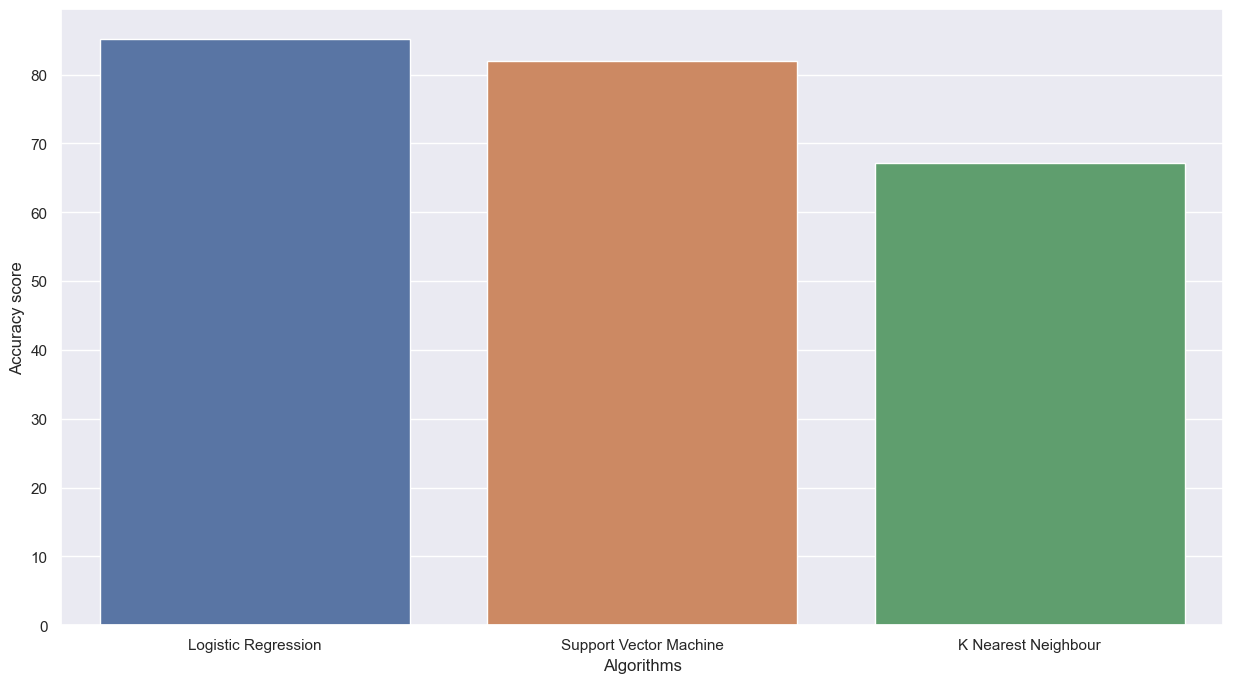

In [58]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)